In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ncvis

In [2]:
import os
import struct

def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)
        
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), rows*cols)
 
    return images, labels

In [3]:
def plot_silhouette(xs, y, ax, marker='o'):
    from sklearn.metrics import silhouette_samples
    scores = silhouette_samples(xs, y)
    labels = np.unique(y)
    n_labels = labels.shape[0]
    macro_scores = np.empty(n_labels)
    for i in range(n_labels):
        macro_scores[i] = np.mean(scores[y == labels[i]])
    score = np.mean(macro_scores)
    std_score = np.std(macro_scores)

    props = dict(boxstyle='round', facecolor='grey', alpha=0.1, linewidth=0)
    info = 'Silhouette Coefficient = {:.3f}±{:.3f}'
    
    n_dims = xs.shape[-1]
    for k in np.unique(y):
        npoints = np.count_nonzero(y==k)
        x1 = x2 = None

        class_mask = (y==k)
        if n_dims == 2:
            x1 = xs[class_mask, 0]
            x2 = xs[class_mask, 1]
        elif n_dims == 1:
            x1 = xs[class_mask, 0]
            x2 = np.random.uniform(0, 1, npoints)
        ax.scatter(x1, x2, marker=marker, label="{}".format(k))
        
    ax.legend(loc='upper right')
    ax.text(0.01, 0.01, info.format(score, std_score), fontsize=14, bbox=props, 
            transform=ax.transAxes)

In [5]:
from sklearn.model_selection import train_test_split

X_mnist, y_mnist = load_mnist('../data/mnist/', kind='train')
X_mnist = X_mnist/255

X_small, _, y_small, _ = train_test_split(X_mnist, y_mnist, test_size=None, train_size=1e-1, stratify=y_mnist, random_state=42)

iris = pd.read_csv("../data/iris/iris.data", header=None, names=["sepal length", "sepal width", "petal length", "petal width", "class"])
X_iris = iris.iloc[:, :4].values
y_iris = iris["class"].astype("category").cat.codes.values

data = {'iris': (X_iris, y_iris),
        'mnist6k': (X_small, y_small),
        'mnist60k': (X_mnist, y_mnist),}

In [6]:
# X, y = data['iris']
X, y = data['mnist6k']

vis = ncvis.NCVis()
Y = vis.fit(X)

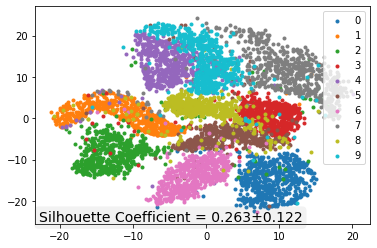

In [7]:
fig, ax = plt.subplots(1, 1)
plot_silhouette(Y, y, ax, marker='.')
plt.show()